# Discussion 4: Visualizing Bigfoot

**The following  questions are the same as question 2 in the discussion 4 worksheet**

Many of you have probably heard of Bigfoot before. It's a mysterious ape-like creature that is said to live in North American forests. Most doubt its existence, but a passionate few swear that Bigfoot is real. In this discussion, you will be working with a dataset on Bigfoot sightings, visualizing variable distributions and combinations thereof to better understand how/when/where Bigfoot is reportedly spotted, and possibly either confirm or cast doubt on its existence. The Bigfoot data contains a ton of variables about each reported Bigfoot spotting, including location information, weather, and moon phase.

In [1]:
# Importing packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading bigfoot data

url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-09-13/bigfoot.csv'
df = pd.read_csv(url)

This dataset is extremely messy, with observations missing many values across multiple columns. This is normally the case with data based on citizen reports (many do not fill out all required fields). For the purposes of this discussion, we will drop all observations with any missing values and some unneeded columns. However, note this is not a good practice and you should almost never do this in real life!

In [3]:
# Drop unneeded rows and observations with missing values

bigfoot = df.dropna().rename({'temperature_high':'temp_high' ,'temperature_low':'temp_low'},axis = 1)
bigfoot = bigfoot.drop(['observed', 'location_details', 'county', 'state', 'title',
       'latitude', 'longitude', 'number', 'classification', 'geohash',
       'temperature_mid', 'dew_point','precip_probability', 'precip_type','summary', 
       'wind_bearing'], axis = 1)

Here are the first few entries of the `bigfoot` table:

In [4]:
bigfoot.head(5)

,season,date,temp_high,temp_low,humidity,cloud_cover,moon_phase,precip_intensity,pressure,uv_index,visibility,wind_speed
10,Summer,2016-06-07,74.69,53.80,0.79,0.61,0.10,0.0010,998.87,6.0,9.70,0.49
21,Summer,2015-10-02,49.06,44.24,0.87,0.93,0.67,0.0092,1022.92,3.0,9.16,2.87
32,Fall,2009-10-31,69.01,34.42,0.77,0.81,0.42,0.0158,1011.48,3.0,1.97,3.94
34,Summer,1978-07-15,68.56,63.05,0.88,0.80,0.33,0.0285,1014.70,5.0,5.71,5.47
55,Summer,2015-11-26,20.49,5.35,0.65,0.08,0.54,0.0002,1037.98,1.0,10.00,0.40


## Question 2

Let's first look at distributions of individual quantitative variables. Let's say we're interested in `wind_speed`. 
### Part A
Which of the following are appropriate visualizations for plotting the distribution of a quantitative variable? (Select all that apply.)

A. Pie charts

<span style="color: red;"> B. Kernel Density Plot </span>

C. Scatter plot

<span style="color: red;"> D. Box plot </span>

<span style="color: red;"> E. Histogram </span>

F. Hex plot

**Solution**: `wind_speed` is a *single quantitative variable*. This rules out pie charts, as they visualize qualitative variables. It also rules out scatter plots and hex plots, as those require at least 2 quantitative variables. The remaining choices are all valid.

### Part B

Write a line of code that produces a visualization that depicts the variable’s **distribution** (example shown below).

![](windspeed.png)

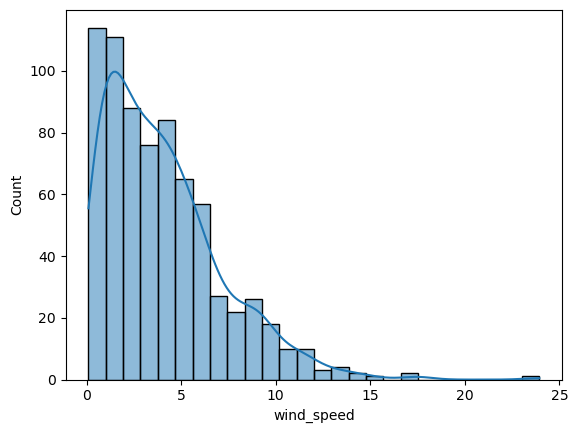

In [5]:
# SOLUTION
sns.histplot(data=bigfoot, x="wind_speed", kde=True);

# ALTERNATE SOLUTION
# sns.histplot(data=bigfoot, x="wind_speed", kde=True, stat="density");

**Staff Notes**: We (optionally) put a semicolon at the end of the plotting code to prevent producing output from the code line. Read more [Here](https://stackoverflow.com/questions/51627233/why-is-there-a-semicolon-after-matplotlibs-plot-function).

### Part C

Now, let's look at some qualitative variables. Write a line of code that produces a visualization that shows the distribution of bigfoot sightings across the variable `season` (example shown below). 

**Hint:** Use `seaborn`'s `sns.countplot` or `matplotlib`'s `plt.bar`.

![](season_bar.png)

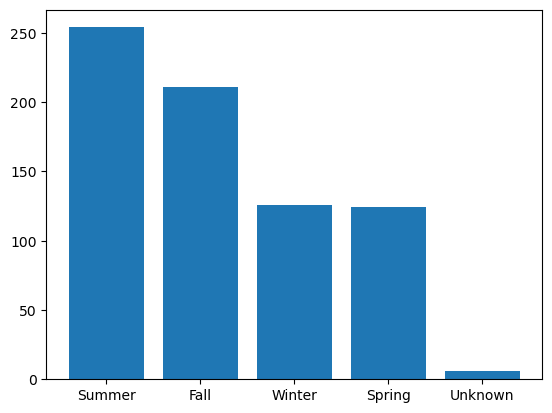

In [6]:
# SOLUTION
season_counts = bigfoot["season"].value_counts()
plt.bar(season_counts.index, season_counts.values);

# ALTERNATE SOLUTION
# season_counts = bigfoot["season"].value_counts() 
# plt.bar(season_counts.index, season_counts.values);

**Staff Notes**: The output of these lines of code will not return the colored bars. In order to add color to the bars, you must specify the color of each bar by passing a list of colors to the color parameter.

### Part D

Finally, roduce a single visualization that showcases how the prevalence of bigfoot sightings at particular combinations of `moon_phase` and `wind_speed` vary across each season.

**Hint**: Think about color as the third information channel in the plot.

![](moon_vs_wind.png)

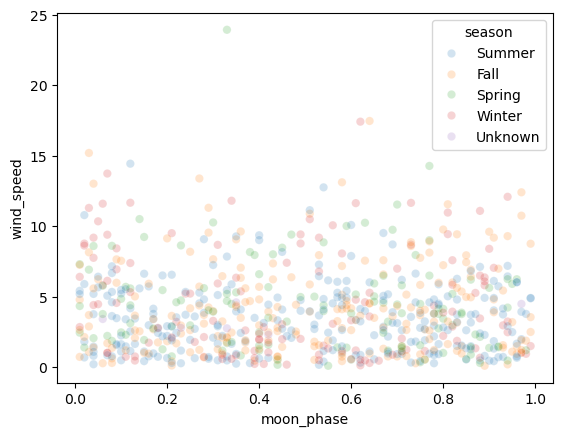

In [7]:
# SOLUTION
sns.scatterplot(data=bigfoot,
x="moon_phase",
y="wind_speed",
hue="season",
alpha=0.2);